**Coursebook: Practical Statistic**
- Part 1 of Introduction to Machine Learning in Python
- Course Length: 6 Hours
- Last Updated: September 2022

___

- Developed by [Algoritma](https://algorit.ma)'s product division and instructors team



# Background

The coursebook is part of the **Introduction to Machine Learning in Python** prepared by [Algoritma](https://algorit.ma). The coursebook is intended for a restricted audience only, i.e. the individuals and organizations having received this coursebook directly from the training organization. It may not be reproduced, distributed, translated or adapted in any form outside these individuals and organizations without permission.

Algoritma is a data science education center based in Jakarta. We organize workshops and training programs to help working professionals and students gain mastery in various data science sub-fields: data visualization, machine learning, data modeling, statistical inference etc.

## Training Objectives

On the first section of this course is to pave the statistical foundation for more advance implementation and machine learning implementation. There will be 2 main objectives:

- **Descriptive Statistics**
- Understanding 5 number summary
- Central tendency measure
- Variability measure
- Z Score and Central limit theorem
- **Inferential Statistics**
- Probability density function
- Confidence intervals
- Hypothesis test

At the end of this course, we’ll be working with Learn by Building module as your graded assignment. You’ll be working in groups and design an A/B testing of your choice!

# Descriptive Statistics

Statisticians and data scientists use descriptive statistics to summarize and describe a large number of measurements. Many times, this task is accompanied with graphs and plots that help describe the numerical summary of data. When data science is applied in the business context, an example of descriptive statistic is the average number of transactions per month. Another example is the percentage of e-commerce transactions with a voucher code applied. The simple rule is that descriptive statistics do not involve generalizing beyond the data we have obtained, and are merely descriptive of what we have at hand. The branch of statistics that deal with drawing inferences about the larger population is called inferential statistics.

Let's start by reading our dataset in, a sample data of telecom customer attrition from [IBM Analytics](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113)

In [1]:
import pandas as pd

churn = pd.read_csv('data_input/telcochurn.csv',index_col=['customer_id'])
churn.head()

,city,gender,senior_citizen,dependents,tenure_months,phone_service,internet_service,contract,monthly_charges,total_charges,churn_label,cltv
customer_id,,,,,,,,,,,,
3668-QPYBK,Los Angeles,Male,No,No,2,Single Line,DSL,Month-to-month,53.850000,108.15,Yes,3239
9237-HQITU,Los Angeles,Female,No,Yes,2,Single Line,Fiber optic,Month-to-month,95.584928,151.65,Yes,2701
9305-CDSKC,Los Angeles,Female,No,Yes,8,Multiple Lines,Fiber optic,Month-to-month,106.013481,820.50,Yes,5372
7892-POOKP,Los Angeles,Female,No,Yes,28,Multiple Lines,Fiber optic,Month-to-month,92.013183,3046.05,Yes,5003
0280-XJGEX,Los Angeles,Male,No,Yes,49,Multiple Lines,Fiber optic,Month-to-month,89.517499,5036.30,Yes,5340


The data contains information about a telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer.

In [2]:
churn.shape

(7043, 12)

In describing data, we are typically concerned with the task of quantifying and comparing **central tendency**, **variability**, and the **shape** of our data.

## Measures of Central Tendency

Often times in the exploratory data analysis phase, we want to get a sense of what the **most representative score** of a particular measurement is. We often simplify this idea by referring to it as the “average”, but there are in fact, three measures of central tendency that you need to have in your statistical toolset.

The most popular measure of central tendency is the **mean**, which is sometimes represented as $\bar{x}$ when computed on a **sample** and represented as $\mu$ when computed on a population. Mean is really the sum of all your measurements, divided by the number of measurements, and works best on data that has an even distribution or a normal distribution (don’t worry if the idea of a normal distribution isn’t clear - we’ll get to that in a while!).

Say for example, for we want to figure out how much is the average monthly charge on retaining customer with fiber-optic internet service:

In [3]:
churn_ex = churn[(churn['churn_label'] == "No") & (churn['internet_service'] == "Fiber optic")]

churn_ex['monthly_charges'].mean()

93.09539264703065

Another way to determine the center point of our data is by using **median**. The median is the point of value that cuts the distribution into two equal halves such that 50% of the observations are below it. To find this value, we would order the observations and find the middle value that separates the distribution into two equal halves.

In [4]:
inventory = pd.Series([5,10,2,3,7])

# when we sort it, we see the middle value being 5gb
inventory.sort_values()

2     2
3     3
0     5
4     7
1    10
dtype: int64

In [5]:
# using median() yield the same result
inventory.median()

5.0

For data with odd number of observations, the median is the middle value but for data with an even number of observations we would instead use the average of the two middle scores:

In [6]:
inventory2 = pd.Series([5,10,2,6,8,8])

# when we order it, we see the middle value being 7
inventory2.sort_values()

2     2
0     5
3     6
4     8
5     8
1    10
dtype: int64

In [7]:
# using median() yield the same result
inventory2.median()

7.0

We need to be cautious when applying the mean on data with a skewed distribution because the mean may not be the best candidate for a most representative score compared to other measures of central tendency.

Let's say, we want to know how much on average the total user traffic we gain per day in a particular area. We took a sample on the user activity and posted the following data (in GB):

In [8]:
traffic = pd.Series([28, 25, 10, 25, 24.5, 200, 30, 50, 27, 29])
traffic.mean()

44.85

In [9]:
traffic.median()

27.5

While the median puts that figure at about 26.5, the mean is about 2 times higher and is not truly representative of the actual daily traffic. While most days have the traffic of less than 30 GB, the mean value of our user traffic would have believe that the average daily traffic on that particular area is in fact more than 44 GB.

The median in this case is a better measure of centrality because it is not sensitive to the outlier data.

If we are in fact, *required* to compute the mean on data with skewed distribution, another technique to reduce the influence of outlier data is to use a slight variation of the mean, called the Trimmed Mean. The trimmed mean removes a small designated percentage of the largest and smallest values before computing the mean. While pandas data frame does not support trimmed mean, we can use `scipy` package for `trim_mean()`:

In [10]:
from scipy.stats import trim_mean

trim_mean(traffic, .1)

29.8125

The second parameters would trimmed 10% of the leftmost and rightmost values after sorting, and this figure is slightly beliavable than the previous one.

When there are discreet values for a variable, the **mode** refers to the value that occurs most frequently. This statistic is rarely used in practice, but pandas data frame also come in with the function:

In [11]:
churn.internet_service.mode()

0    Fiber optic
dtype: object

## Measures of Spread


Earlier, we have observed that in average, the monthly charge on retaining customer with Fiber optic internet service is around 93 USD:

In [12]:
churn_ex = churn[(churn['churn_label'] == "No") & (churn['internet_service'] == "Fiber optic")]

churn_ex['monthly_charges'].mean()

93.09539264703065

But, how does we know how each customer monthly charge varies from each other? 

Measures of spread measures the extent to which **value in a distribution differ from each other.** In practice, it is far easier to compute the distance between the values to their mean and when we square each one of these distances and add them all up the average of that result is known as **variance**:

$S^2 = \frac{\displaystyle\sum_{i=1}^{n}(x_i - \mu)^2} {n-1}$

Taking the square root of the variance will result in the **standard deviation**. Just like the mean, standard deviation is the “expected value” of how far the scores deviate from the mean.

In [13]:
var = ((churn_ex['monthly_charges'] - churn_ex['monthly_charges'].mean())**2).sum() / (len(churn_ex['monthly_charges'])-1)
round(var,2)

93.24

In [14]:
round(churn_ex['monthly_charges'].var(),2)

93.24

And taking the square root of variance yields the standard deviation:

In [15]:
import math

math.sqrt(churn_ex['monthly_charges'].var())

9.655901285677787

In [16]:
churn_ex['monthly_charges'].std()

9.655901285677787

As stated before, think of standard deviation as the "expected standard deviation from the mean", means that if we were to calculate its mean, we expect positive and negative deviation around 10 USD from the average monthly charge (93 USD).

Variance and standard deviation are always positive when the values are not identical. When there’s no variability, the variance is 0. Because variance and standard deviation are sensitive to every value, they may not be the most “representative” measurement for skewed data.

Other measurements of the spread are the **range** and the **interquartile range**. The range is the distance from our smallest measurement to the largest one:

In [17]:
max_charge = churn_ex['monthly_charges'].max()
min_charge = churn_ex['monthly_charges'].min()

range_charge = max_charge - min_charge
range_charge

67.67047151338875

The interquartile range is the range computed for the middle 50% of the distribution:

In [18]:
q3_charge = churn_ex['monthly_charges'].quantile(0.75)
q1_charge = churn_ex['monthly_charges'].quantile(0.25)

iqr_charge = q3_charge - q1_charge
iqr_charge

13.143992475432725

Recall how we can call `describe()` to create a summarized numerical information for each column? It gives us a quick access to what we have learned in this section:

In [19]:
churn_ex['monthly_charges'].describe()

count    1799.000000
mean       93.095393
std         9.655901
min        59.687275
25%        86.485449
50%        93.411244
75%        99.629442
max       127.357746
Name: monthly_charges, dtype: float64

**Discussion:**

Which financial assets has more votality in their annual price?

In [20]:
price_coins = [1.4, 0.4, 0.8, 1.1, 1.8, 2.2, 2.3, 1.2]
price_oil = [1.6, 1.2, 1.9, 0.8, 0.6, 1.5, 2.1, 1.5]

The primary measure of votality used by stock traders and financial analysts is standard deviation, and recall that this metric reflects the average amount of an item’s price over a period of time. While the price for our fictional “oil” asset and “coins” asset averaged out to be USD 1.4 over time, which of these two present a higher votality than the other?

In [21]:
## Your code here



A common way to quickly inspect a data is by using visualization techniques. Let's recall how we can use pandas' built-in plot to create a boxplot. Boxplot is a visual way to discover several components from data:  
- First quantile  
- Median  
- Third quantile  
- Inner and outer fence  
- Outliers  

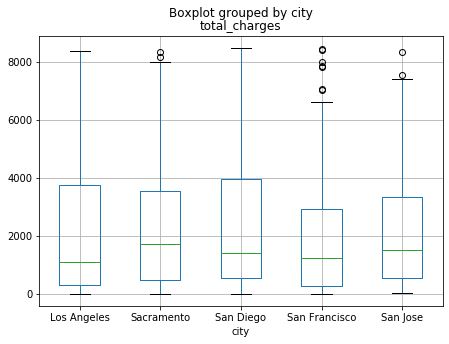

In [30]:
import matplotlib.pyplot as plt

top5city = churn.city.value_counts().head(5).index
churn_top5 = churn[churn['city'].isin(top5city)]

churn_top5.boxplot(column = 'total_charges', by= 'city', figsize=(7,5))

How do you interpret the above boxplot? Can you say whether or not each city has different monetary value?

In [23]:
## Your answer here



## Covariance and Correlation

When we have two samples, X and Y, of the same size, then the **covariance** is an estimate of how **variation in X is related to the variation in Y**. Covariance measures how two variables *covary* and is represented as:

$Cov(X,Y) = \frac{1}{n-1} \sum_{i=1}^{n}(X_i - \mu_X)(Y_i - \mu_Y)$

In [24]:
churn.cov()

,tenure_months,monthly_charges,total_charges,cltv
tenure_months,603.168108,118.392678,4.595074e+04,1.151767e+04
monthly_charges,118.392678,879.054712,3.629131e+04,2.206436e+03
total_charges,45950.743236,36291.305120,5.138252e+06,9.162135e+05
cltv,11517.673942,2206.435634,9.162135e+05,1.399624e+06


Getting a negative covariance means that smaller X tends to be associated with larger Y (and vice versa). The covariance of any variable with itself is its variance2. Notice also that $Cov(X,Y) = Cov(Y,X)$.

**Correlation**, unlike covariance, is not sensitive to the units in which our variables X and Y are measured and hence more useful for determining how strong the relationship is between variables:

In [25]:
churn.corr()

,tenure_months,monthly_charges,total_charges,cltv
tenure_months,1.000000,0.162591,0.825880,0.396406
monthly_charges,0.162591,1.000000,0.540078,0.062904
total_charges,0.825880,0.540078,1.000000,0.341837
cltv,0.396406,0.062904,0.341837,1.000000


Some facts about correlation:  
- $Cor(X,Y) == Cor(Y,X) $ 
- $-1 <= Cor(X,Y) <= 1 $ 
- $Cor(X,Y)$ is 1 or -1 only when the X and Y observations fall perfectly on a positive or negatively sloped line  
- $Cor(X,Y) = 0$ implies no linear relationship  

## The Normal Distribution

Another way of studying the central tendency and spread of data is through a curve: a curve is often used to represent a distribution and the most famous of all distributions is the normal curve.

A normal distribution with a mean of 0 and standard deviation of 1 is called a **standard normal curve** and can be plotted with while specifying the limits for our x-axis:

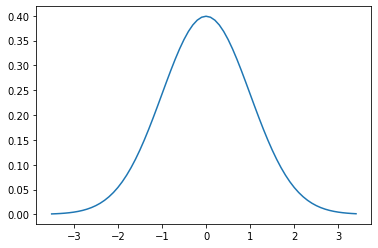

In [52]:
import scipy.stats as st
import numpy as np

mean = 0
std = 1

x = np.arange(-3.5, 3.5, 0.1)
y = st.norm(mean, std).pdf(x)

plt.plot(x, y)

When a measurement follows a standard normal distribution, then the assumptions of a normal distribution can be applied to the data and these assumptions can be completely specified by two parameters, which are the mean and standard deviation. The empirical rule of a standard normal gives us the following:

- 68% of data will fall within 1 standard deviation of the mean  
- 95% of data will fall within 2 standard deviations of the mean  
- 99.7% of data will fall within 3 standard deviations of the mean  

Scroll back to the normal curve we plotted above, observe:  
- It is perfectly symmetrical   
- It is unimodal (has only a single mode)  
- Area under curve is 1  

One relating idea that gives the normal distribution such significance is known as the **Central limit theorem**: it says that when we have many independent variables generated by all kinds of distributions, the aggregate of those variables will tend toward a normal distribution assuming of course the lack of any extraordinary intervention. This universality is observed across different domains making the normal distribution a core centerpiece in applied statistics and mathematics.

As an exercise, I’d like you to generate 50 random numbers using `numpy` indicating mean of 0 and standard deviation of 1. Now use the `density()` function I created and create a plot based on the generated 50 random numbers:

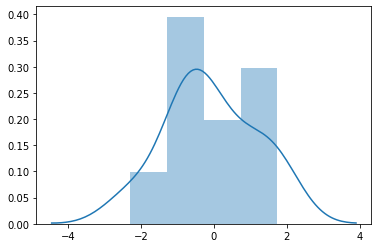

In [53]:
import seaborn as sns
np.random.seed(1)

x = np.random.randn(10)
sns.distplot(x)

Supposed you were to change 10 to 100, and then to 1000 and even 10,000, what did you observe? The key takeaway here is that as the number of sample approach infinity this plot will eventually converge in distribution to the standard normal.

# Inferential Statistics

## Probability Density & Mass Function

Discrete random variables (number of player injury, amount of defaulted loans, travel bookings per customer) can be described using a probability mass function, which maps each value of the random variable to a probability:  
- p(0 bookings) = 0.28  
- p(1 booking) = 0.09  
- …  
- p(6 bookings) = 0.004  

Because they are probabilities, these individual probabilities have to sum up to 1.

When we’re thinking about continuous random variables (blood sugar level, height, rainfall amount), on the other hand, it is important to realize that this variable has an uncountable number of possible values, even between two real intervals. The resulting probability distribution of the variable can be described by a probability density, where the probability is found by taking the area under the curve.

![](assets/pdf.svg)


Going back to the standard normal distribution - you may be asking by now how any of what you’re learning in the past few chapters are useful. To answer the question, I feel it is only appropriate we solidify these intuition with a few concrete examples. Consider the following scenario:

The height of men in Indonesia is normally distributed with a mean of 160cm and a standard deviation of 7cm. What is the probability of a randomly selected man being taller than 175cm?

In [55]:
Z = (175-160)/7
p = st.norm.cdf(Z)

print(1-p)

0.016062285603828275


The solution: 175cm is 15cm above the mean, and dividing that by the standard deviation of 7cm, we get 2.143. We refer to this as the **z-score**. The probability of an Indonesian men being taller than 175cm is P(Z > 2.143) = 0.161.

**Discussion:**

We know that retaining customer with Fiber Optic service's average monthly charge is 93 USD and has standard deviation of 10 USD. What is the probability of a random customer has monthly charge **below** 100 USD?

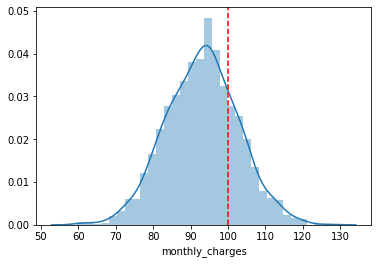

In [54]:
sns.distplot(churn_ex['monthly_charges']).axvline(100, color='r', linestyle='--')

In [ ]:
## Your code here


*Bonus Challenge*:

We know that `st.norm.cdf()` only computes area **below** the Z score. What if we want to know the area between two values? What is the probability of a random retaining customer with Fiber Optic service has monthly charge **between** 90 to 100 USD?

In [ ]:
## Your code here


The Z-scores we used above is useful when relating different measurement distributions to each acting as a common denominator. Essentially, a z-score gives us a “standardized” unit that measure how many standard deviations is a particular statistic away from the mean. This property, as we’ll see, is paramount to many statistical hypothesis tests, performance evaluation (more of that when we get to the Machine Learning courses), and in the construction of confidence or prediction intervals.

## Standard Error and Confidence Intervals

A related concept to standard deviation, that is quite foundational to inferential statistics is the standard error of the mean. Say, we are surveying the number of times a customer pay the internet bill with an e-wallet app over the period of year and collected the following sample:

In [31]:
numberofbookings = pd.Series([2,2,3,1,0,4,2,5,1,2,4])
numberofbookings

0     2
1     2
2     3
3     1
4     0
5     4
6     2
7     5
8     1
9     2
10    4
dtype: int64

Standard error is a measure that estimates how close a calculated mean (sample) is likely to be to the true mean of that population; It is calculated by dividing the standard deviation of the sample data by the square root of the number of observations:

In [29]:
import math

(numberofbookings.std())/ math.sqrt(numberofbookings.size)

0.4527236217450448

In [30]:
from scipy import stats

stats.sem(numberofbookings)

0.4527236217450448

On a normal distribution, 68% of the time the true population mean will lie within the range of +- 1 SE. In other words, if we can establish a normal distribution, we can theorize about the true value of the population mean with a range. Because of the formula:

$SE = \frac{\sigma}{\sqrt{}n}$

The larger our sample size n gets, the smaller SE will be: and hence we are less uncertain about our estimation of the true population mean.

The standard error of a mean provides a statement of probability about the difference between the mean of the population and the mean of the sample. We often begin our estimation with a point estimate, using for example the sample mean $\bar{x}$ as a point estimate of the population mean $\mu$. We can then construct confidence intervals around our point estimates so we have an interval that may contain the true value of the parameter. When statisticians say a “95% confidence interval”, what they mean is that if we create 100 confidence intervals of the same size from a given population, we expect to find the true parameter (let’s say the population’s net savings per household) in 95 of them.

We construct a confidence interval by taking the point estimate +/- margin of error, where margin of error is computed as:  

$E=Z_{a/2} \times SE$

Because confidence intervals are two-sided the level of significance we chose (alpha) has to be divided into halves. When we compute by finding the z-score associated with a value of 2.5% (0.025) on each end, we end up looking at the middle 95% of the area under the curve. We can use `ppf()` from `scipy` package to help us find the z-score associated with a 95% confidence interval):

In [34]:
from scipy.stats import norm

norm.ppf(.025) # 95% confidence interval

-1.9599639845400545

Again, let’s put together a scenario to make all of this more concrete. Say we want to know the average annual dividend payout in Telco industry, and had known through an earlier study that this figure resembles a normal distribution with a population standard deviation of 2.4%. We looked at the public books of these 81 companies in said industry and attain a sample mean of 11.8% (that is, the average company from this group of 81 companies pay 11.8% of profit to their shareholders annually). We want to construct a 95% confidence interval for the $\mu$, the mean dividend payout.

In [83]:
# Your code here


Solution: 
- Z-score associated with a 95% confidence interval is 1.96  
- The standard error of the mean (SE) is $\frac{2.4}{\sqrt{81}} = 0.267$   
- The margin of error (E) is $1.96 \times SE = 0.524$  
- The confidence interval is 11.8% +- 0.524%  

And so we can say that the 95% confidence interval for the mean dividend payout in this industry is (11.28%, 12.32%). We can be 95% confident that this interval will contain the mean dividend payout for this particular industry.

## p-value

In your day to day data science work, you will often be required to explain the model’s reliability and uncertainty, and the formal process of such is specified as something called the **test of significance**. Statistical significance often reference the **p-value**, a measure of the probability of obtaining a result equal to or more extreme than what was actually observed, assuming the null hypothesis is true.

Imagine a scenario where you’re assigned to consult on Quicker, a startup that simplify and automate government grants application for newly incorporated startups. Through public announcements and official records, you find that the average duration for a newly incorporated startup to get its first government grant or financial funding is 215 days (with a population standard variance of 24 days, again through official records). Of the 35 entrepreneurs using Quicker platform, the average time is 178 days.

**Discussion:**
Does this observation (178 days) deviate away from the population enough for it to be statistically significant? Use a 95% confidence interval

$H_0: \mu = \mu_0$  
$H_A: \mu < \mu_0$

The null hypothesis is that our new mean equals to the original mean, whereas the alternative hypothesis states that the mean of Quicker customers **is lower** than the original mean.

In [84]:
# Your code here


Solution:

Recall what we’ve learned about the z-score, we can compute the p-value as follow:

In [85]:
Z = (178-215)/24
p = st.norm.cdf(Z)

'{:,.4f}'.format(p)

'0.0616'

While we can reject the null hypothesis at the 95% confidence level if our p-value is <= alpha (0.05), this is not the case here as our p-value is actually 0.0616. In this scenario, we fail to reject the null hypothesis and fail to proof that the Quicker platform did in fact led to a statistically significant reduction in government funding time.

## T-Test

Generally, z-tests are used when we have a large enough sample size (rule of thumb is n >= 30) and when the population standard deviation is known. If the above conditions aren’t met, we can instead use a statistical measurement known as the Student’s t-test. Say grant automation platform has 10 users so far and that the population standard deviation (sigma) is not known.

In [86]:
times = [184, 181, 230, 169, 158, 204, 220, 197, 219, 223]


To perform a t-test we can use groups of t-test functions from `scipy.stats`. Here we’re interested in finding out whether we can reject the null hypothesis (that says there is no difference in government funding time for Quicker startups and other startups) in favor of the alternative hypothesis (that Quicker startup spend less time on average to acquire their first grant):

In [87]:
from scipy import stats

stats.ttest_1samp(times, 215)

Ttest_1sampResult(statistic=-2.104098191307367, pvalue=0.06468659586101468)

Since we use `ttest_1samp()`, it calculates the p-value to proof that the expected value (mean) of a sample of independent observations a is equal to the given population mean. The p-value is not smaller than 0.05 means we fail to reject the null hypothesis that the 2 population is equal.

There are multiple variation of the t-test function in scipy, namely a common one:  
- `ttest_ind()`: Used two samples for the null hypothesis that 2 independent samples have identical average (expected) values  
- `ttest_ind_from_stats()`: Used two samples mean, standard deviation, and number of observation for the null hypothesis that two independent samples have identical average (expected) values.  
- `ttest_rel()`: Used 2 repeated samples that the samples have identical average (expected) values  


**Dive Deeper:**

Recall our `hp` dataset, can you proof that Samsung phones that are sold in Batam are indeed significantly cheaper than the one sold in other cities?

In [88]:
# Your code here
